[{'winRate': 37.28156, 'touchesPerGame': 0.08349514563106795, 'notMissRate': 75.2322, 'sendRate': 6.976744, 'notMakeMistakeRate': 16.279070000000004}, {'winRate': 71.31631, 'touchesPerGame': 1.0589390962671905, 'notMissRate': 93.150685, 'sendRate': 56.95733, 'notMakeMistakeRate': 74.95362}, {'winRate': 38.73371, 'touchesPerGame': 0.4022346368715084, 'notMissRate': 72.2561, 'sendRate': 24.07407, 'notMakeMistakeRate': 30.09259}, {'winRate': 44.84733, 'touchesPerGame': 0.45610687022900764, 'notMissRate': 70.13889, 'sendRate': 36.82008, 'notMakeMistakeRate': 41.00418}, {'winRate': 45.3831, 'touchesPerGame': 0.45972495088408644, 'notMissRate': 69.78417, 'sendRate': 38.88889, 'notMakeMistakeRate': 41.88034}, {'winRate': 54.68451, 'touchesPerGame': 0.7151051625239006, 'notMissRate': 89.45148, 'sendRate': 42.51337, 'notMakeMistakeRate': 54.81284}, {'winRate': 56.68663, 'touchesPerGame': 0.6646706586826348, 'notMissRate': 86.17511999999999, 'sendRate': 46.54655, 'notMakeMistakeRate': 59.45946},

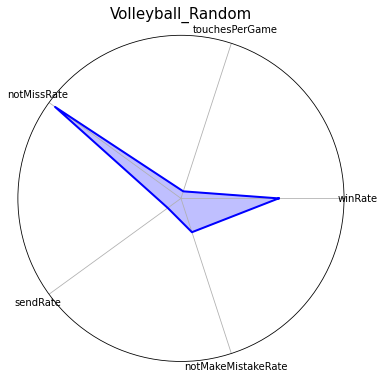

{'winRate': 1.0, 'touchesPerGame': 1.0, 'notMissRate': 1.0, 'sendRate': 1.0, 'notMakeMistakeRate': 1.0}


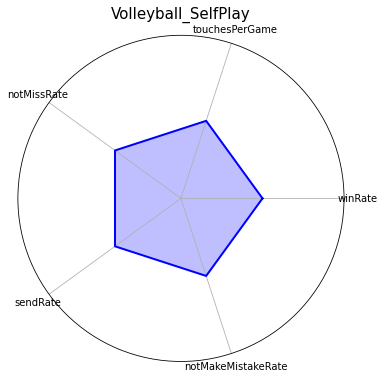

{'winRate': 0.5431255486998696, 'touchesPerGame': 0.3798468092163224, 'notMissRate': 0.7756904847237571, 'sendRate': 0.4226685134292636, 'notMakeMistakeRate': 0.40148281030322486}


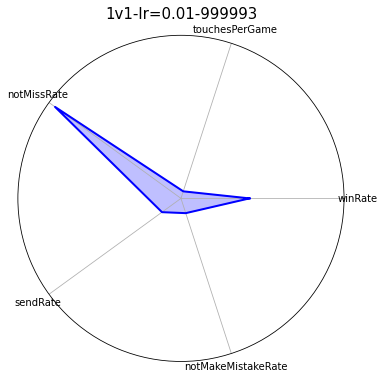

{'winRate': 0.6288509598996358, 'touchesPerGame': 0.43072058802702207, 'notMissRate': 0.752961612681646, 'sendRate': 0.6464502461755142, 'notMakeMistakeRate': 0.547060702338326}


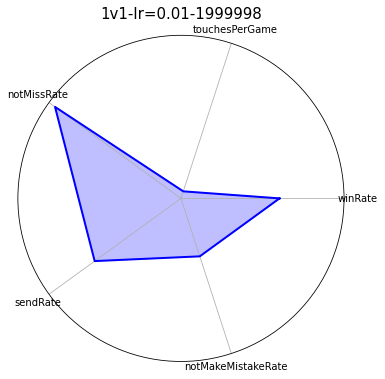

{'winRate': 0.6363635471324862, 'touchesPerGame': 0.43413729128014844, 'notMissRate': 0.7491535891550342, 'sendRate': 0.6827723490549856, 'notMakeMistakeRate': 0.5587500643731417}


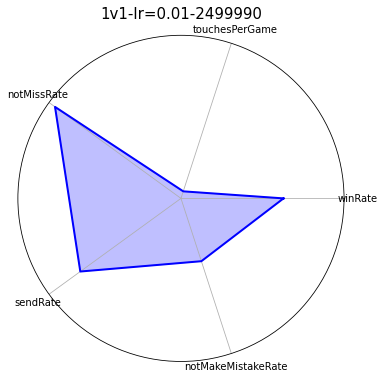

{'winRate': 0.7667882704531405, 'touchesPerGame': 0.6753033909548524, 'notMissRate': 0.9602879463527295, 'sendRate': 0.7464073544177721, 'notMakeMistakeRate': 0.731290096462319}


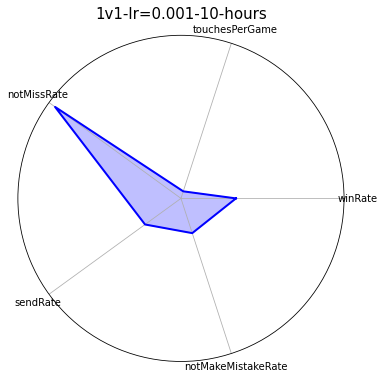

{'winRate': 0.7948620729255341, 'touchesPerGame': 0.6276760023552154, 'notMissRate': 0.9251152581432975, 'sendRate': 0.8172179068084828, 'notMakeMistakeRate': 0.7932833664338027}


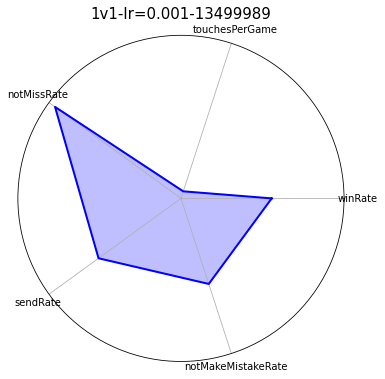

{'winRate': 0.7246462976000861, 'touchesPerGame': 0.711779691523828, 'notMissRate': 0.9947762917685469, 'sendRate': 0.730093211883352, 'notMakeMistakeRate': 0.713312445749785}


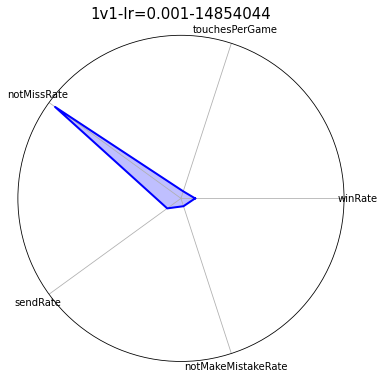

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Read data from the file
file_path = "statistics.txt"
with open(file_path, "r") as file:
    data = file.read()

# Parse the data using regex
pattern = r"'([^']+)': \{'gamesPlayed': (\d+), 'winRate': ([\d,]+), 'touches': (\d+), 'missRate': ([\d,]+), 'sendRate': ([\d,]+), 'mistakeRate': ([\d,]+)\}"
matches = re.findall(pattern, data)

# Prepare data for radar charts
behaviors = []
stats = []

for match in matches:
    behavior, gamesPlayed, winRate, touches, missRate, sendRate, mistakeRate = match
    gamesPlayed = int(gamesPlayed)
    touches = int(touches)
    behaviors.append(behavior)
    stats.append({
        "winRate": float(winRate.replace(",", ".")),
        "touchesPerGame": touches / gamesPlayed if gamesPlayed > 0 else 0,
        "notMissRate": 100 - float(missRate.replace(",", ".")),
        "sendRate": float(sendRate.replace(",", ".")),
        "notMakeMistakeRate": 100 - float(mistakeRate.replace(",", "."))
    })

print(stats)

# Radar chart function
def plot_radar_chart(data, behavior):
    labels = list(data.keys())
    stats = list(data.values())

    # Add the first value to close the radar chart
    stats += stats[:1]
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, stats, color='blue', alpha=0.25)
    ax.plot(angles, stats, color='blue', linewidth=2)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(behavior, size=15, position=(0.5, 1.1))

    plt.show()

# Normalize stats for fair comparison
max_values = {
    "winRate": max(stat["winRate"] for stat in stats),
    "touchesPerGame": max(stat["touchesPerGame"] for stat in stats),
    "notMissRate": max(stat["notMissRate"] for stat in stats),
    "sendRate": max(stat["sendRate"] for stat in stats),
    "notMakeMistakeRate": max(stat["notMakeMistakeRate"] for stat in stats),
}

# Plot radar chart for each behavior
for behavior, stat in zip(behaviors, stats):
    normalized_stat = {key: value / max_values[key] for key, value in stat.items()}
    print(normalized_stat)
    plot_radar_chart(normalized_stat, behavior)


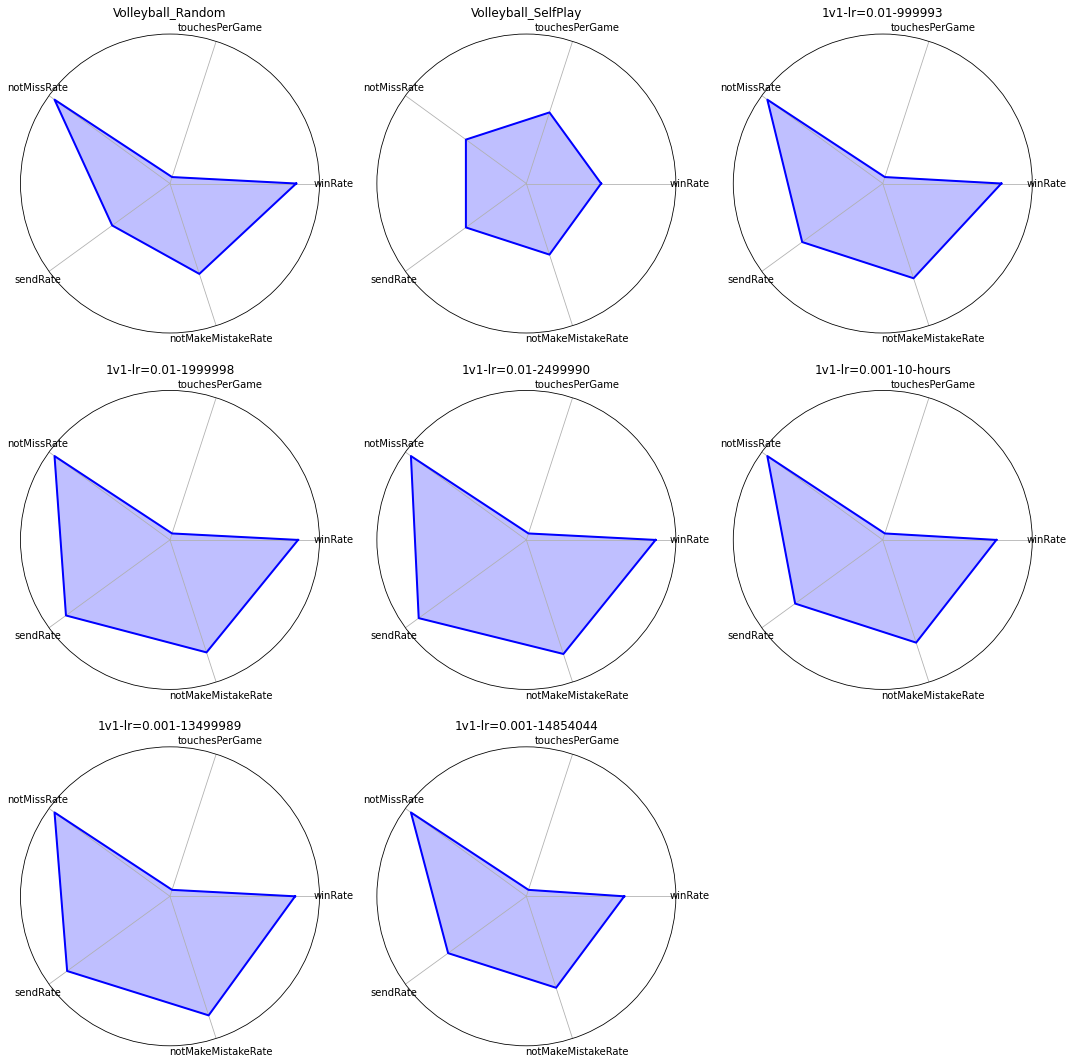

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import re
import math

# Read data from the file
file_path = "statistics.txt"
with open(file_path, "r") as file:
    data = file.read()

# Parse the data using regex
pattern = r"'([^']+)': \{'gamesPlayed': (\d+), 'winRate': ([\d,]+), 'touches': (\d+), 'missRate': ([\d,]+), 'sendRate': ([\d,]+), 'mistakeRate': ([\d,]+)\}"
matches = re.findall(pattern, data)

# Prepare data for radar charts
behaviors = []
stats = []

for match in matches:
    behavior, gamesPlayed, winRate, touches, missRate, sendRate, mistakeRate = match
    gamesPlayed = int(gamesPlayed)
    touches = int(touches)
    behaviors.append(behavior)
    stats.append({
        "winRate": float(winRate.replace(",", ".")),
        "touchesPerGame": touches / gamesPlayed if gamesPlayed > 0 else 0,
        "notMissRate": 100 - float(missRate.replace(",", ".")),
        "sendRate": float(sendRate.replace(",", ".")),
        "notMakeMistakeRate": 100 - float(mistakeRate.replace(",", "."))
    })

# Apply logarithmic transformation
def log_transform(value, base=10):
    return math.log(value + 1, base)  # Add 1 to handle zero values gracefully

# Normalize and log-transform stats
transformed_stats = []
for stat in stats:
    transformed_stats.append({
        key: log_transform(value) for key, value in stat.items()
    })

# Find max values for normalization after log transformation
max_values = {key: max(stat[key] for stat in transformed_stats) for key in transformed_stats[0].keys()}

# Number of subplots
n = len(behaviors)
rows = int(np.ceil(n / 3))
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), subplot_kw=dict(polar=True))
axes = axes.flatten()

# Plot radar chart for each behavior
for idx, (behavior, stat) in enumerate(zip(behaviors, transformed_stats)):
    normalized_stat = {key: value / max_values[key] for key, value in stat.items()}
    
    labels = list(normalized_stat.keys())
    stats = list(normalized_stat.values())

    # Add the first value to close the radar chart
    stats += stats[:1]
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    ax = axes[idx]
    ax.fill(angles, stats, color='blue', alpha=0.25)
    ax.plot(angles, stats, color='blue', linewidth=2)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(behavior, size=12, position=(0.5, 1.1))

# Remove unused subplots
for idx in range(len(behaviors), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


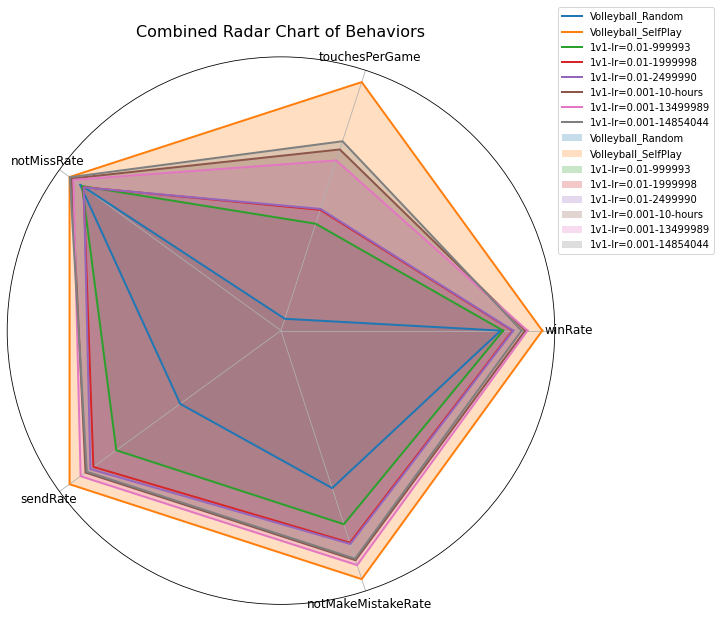

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import re
import math

# Read data from the file
file_path = "statistics.txt"
with open(file_path, "r") as file:
    data = file.read()

# Parse the data using regex
pattern = r"'([^']+)': \{'gamesPlayed': (\d+), 'winRate': ([\d,]+), 'touches': (\d+), 'missRate': ([\d,]+), 'sendRate': ([\d,]+), 'mistakeRate': ([\d,]+)\}"
matches = re.findall(pattern, data)

# Prepare data for radar charts
behaviors = []
stats = []

for match in matches:
    behavior, gamesPlayed, winRate, touches, missRate, sendRate, mistakeRate = match
    gamesPlayed = int(gamesPlayed)
    touches = int(touches)
    behaviors.append(behavior)
    stats.append({
        "winRate": float(winRate.replace(",", ".")),
        "touchesPerGame": touches / gamesPlayed if gamesPlayed > 0 else 0,
        "notMissRate": 100 - float(missRate.replace(",", ".")),
        "sendRate": float(sendRate.replace(",", ".")),
        "notMakeMistakeRate": 100 - float(mistakeRate.replace(",", "."))
    })

# Apply logarithmic transformation
def log_transform(value, base=10):
    return math.log(value + 1, base)  # Add 1 to handle zero values gracefully

# Normalize and log-transform stats
transformed_stats = []
for stat in stats:
    transformed_stats.append({
        key: log_transform(value) for key, value in stat.items()
    })

# Find max values for normalization after log transformation
max_values = {key: max(stat[key] for stat in transformed_stats) for key in transformed_stats[0].keys()}

# Normalize transformed stats
normalized_stats = []
for stat in transformed_stats:
    normalized_stats.append({
        key: value / max_values[key] for key, value in stat.items()
    })

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Define angles for radar chart
categories = list(normalized_stats[0].keys())
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the radar chart

# Plot each behavior
for behavior, stat in zip(behaviors, normalized_stats):
    values = list(stat.values())
    values += values[:1]  # Close the radar chart
    ax.fill(angles, values, alpha=0.25, label=behavior)
    ax.plot(angles, values, linewidth=2, label=behavior)

# Add labels and legend
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_title("Combined Radar Chart of Behaviors", size=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


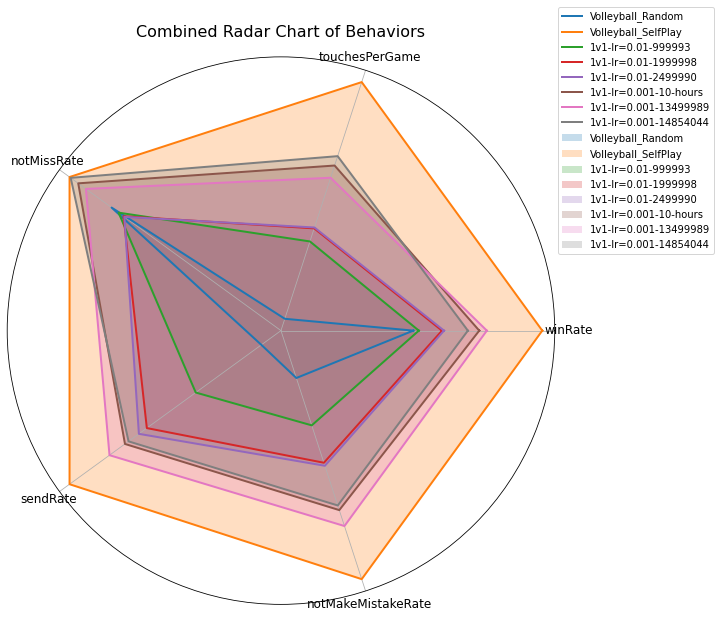

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Read data from the file
file_path = "statistics.txt"
with open(file_path, "r") as file:
    data = file.read()

# Parse the data using regex
pattern = r"'([^']+)': \{'gamesPlayed': (\d+), 'winRate': ([\d,]+), 'touches': (\d+), 'missRate': ([\d,]+), 'sendRate': ([\d,]+), 'mistakeRate': ([\d,]+)\}"
matches = re.findall(pattern, data)

# Prepare data for radar charts
behaviors = []
stats = []

for match in matches:
    behavior, gamesPlayed, winRate, touches, missRate, sendRate, mistakeRate = match
    gamesPlayed = int(gamesPlayed)
    touches = int(touches)
    behaviors.append(behavior)
    stats.append({
        "winRate": float(winRate.replace(",", ".")),
        "touchesPerGame": touches / gamesPlayed if gamesPlayed > 0 else 0,
        "notMissRate": 100 - float(missRate.replace(",", ".")),
        "sendRate": float(sendRate.replace(",", ".")),
        "notMakeMistakeRate": 100 - float(mistakeRate.replace(",", "."))
    })

# Find max values for normalization
max_values = {key: max(stat[key] for stat in stats) for key in stats[0].keys()}

# Normalize stats
normalized_stats = []
for stat in stats:
    normalized_stats.append({
        key: value / max_values[key] for key, value in stat.items()
    })

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Define angles for radar chart
categories = list(normalized_stats[0].keys())
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the radar chart

# Plot each behavior
for behavior, stat in zip(behaviors, normalized_stats):
    values = list(stat.values())
    values += values[:1]  # Close the radar chart
    ax.fill(angles, values, alpha=0.25, label=behavior)
    ax.plot(angles, values, linewidth=2, label=behavior)

# Add labels and legend
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_title("Combined Radar Chart of Behaviors", size=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()
